# Bulk Image Enhancer

**Authors:** Camarillo, Bryan and Olalia, Pamela <br>
**Section:** STDISCM - S13

In [42]:
from PIL import Image, ImageEnhance
import threading

semaphore = threading.BoundedSemaphore(value=5)
path = 'images/'
savePath = 'enhanced/'

f = open("stats.txt", "w")
f = open("stats.txt", "a")




def enhanceImage(filename, contrast, brightness, sharpness):
    semaphore.acquire()
    image = Image.open(path + filename)
    imageContrast = ImageEnhance.Contrast(image).enhance(contrast)
    imageBrightness = ImageEnhance.Brightness(imageContrast).enhance(brightness)
    imageSharpness = ImageEnhance.Sharpness(imageBrightness).enhance(sharpness)
    imageSharpness.save(savePath + str(filename))

    #print("PathName: ", (savePath + str(filename)))
    f = open("stats.txt", "a")
    f.write((savePath + str(filename))+ "\n" )
  
    f.close()

    
    semaphore.release()





In [43]:
from os import listdir
import cv2
from matplotlib import pyplot as plt
import time


contrast = float(input('Enter Contrast Value: '))
brightness = float(input('Enter Brightness Value: '))
sharpness = float(input('Enter Sharpness Value: '))
start = time.time()
for image in listdir(path):
    enhanceImage(image, contrast, brightness, sharpness)
duration = time.time() - start

In [44]:
print("Elapsed time: ", duration)

Elapsed time:  1.2335748672485352


In [45]:
import threading

path = 'images/'
savePath = 'enhanced/'

endTime = int(input('Enter time duration (in seconds): '))
counter = 0
startTime = time.time()
for image in listdir(path):
    t = threading.Thread(target=enhanceImage, args=(image, contrast, brightness, sharpness,))
    t.start()
    counter += 1
    
    if endTime < time.time() - startTime:
        break
        
totalDur = time.time() - startTime
f = open('stats.txt', 'r+')
f.truncate(0)

f = open('stats.txt', 'r')
f = open('stats.txt', 'a')

f.write('IMAGES ENHANCED:'+ str(counter)+ '\n \nLOCATIONS: \n')
f.close()


In [46]:
print("Total elapsed time: ", totalDur)
print("Total images enhanced: ", counter)

Total elapsed time:  0.013437986373901367
Total images enhanced:  11


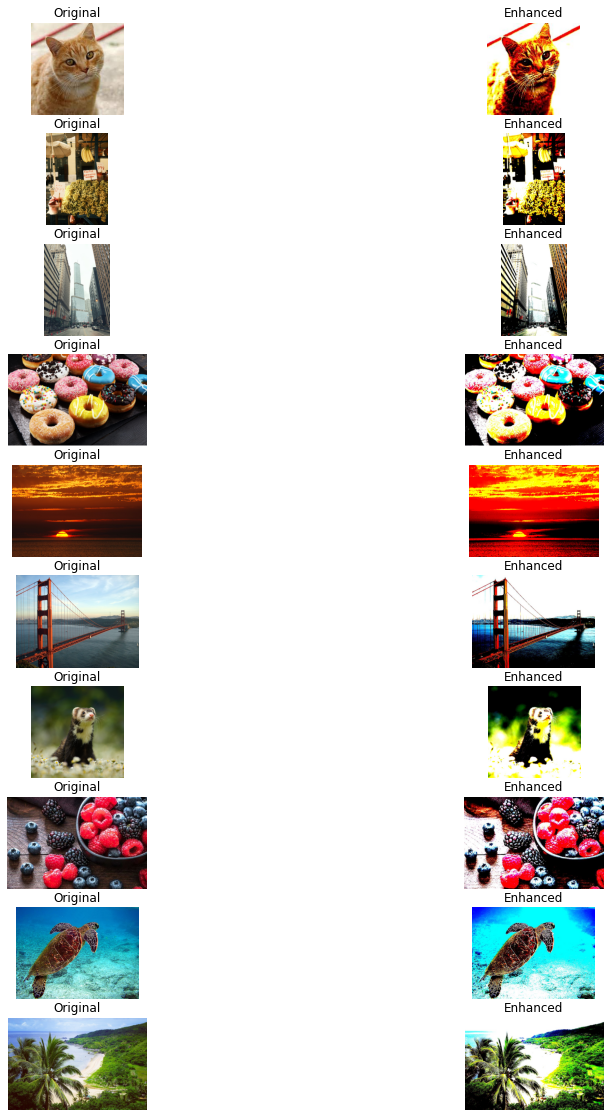

In [47]:
path = 'images/'
savePath = 'enhanced/'

figure = plt.figure(figsize=(15, 20))

i = 1
columns = 2
rows = 10

for image in listdir(path):
    image_normal = cv2.imread(path + image)
    image_enhanced = cv2.imread(savePath + image)
    image_normal = cv2.cvtColor(image_normal, cv2.COLOR_BGR2RGB)
    image_enhanced = cv2.cvtColor(image_enhanced, cv2.COLOR_BGR2RGB)
    
    figure.add_subplot(rows, columns, i)
    plt.imshow(image_normal)
    plt.axis('off')
    plt.title('Original')
    i += 1
    
    figure.add_subplot(rows, columns, i)
    plt.imshow(image_enhanced)
    plt.axis('off')
    plt.title('Enhanced')
    i += 1
    if i == 21:
        break
    
plt.show()


